In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# Ścieżka do pliku CSV
file_name_1 = 'times_6_32.csv'
file_name_2 = 'times_0_4.csv'

df1 = pd.read_csv(file_name_1)
df2 = pd.read_csv(file_name_2)

# Połączenie obu DataFrame w jeden
# Domyślnie łączy wzdłuż wierszy (axis=0)
df = pd.concat([df1, df2], ignore_index=True)

df.head()

,processes,size,time
0,6,100,1.558250
1,6,100,0.987461
2,6,100,1.545060
3,6,100,1.546960
4,6,100,1.625240


In [14]:
def plot_histogram(_df,proc,size,bins):
    """
    Funkcja rysuje histogramy dla danych czasów wykonania.
    """
    df = _df.loc[(_df["processes"] == proc) & (_df["size"] == size )]

    plt.figure(figsize=(10, 6))

    # Rysowanie histogramu dla czasów wykonania
    plt.hist(df["time"], bins=bins)

    # Dodanie etykiet i tytułu
    plt.xlabel('Czas wykonania (s)')
    plt.ylabel('Liczba prób')
    plt.title('Histogram czasów wykonania dla różnych liczby procesów')

    # Wyświetlenie wykresu
    plt.grid(True)
    plt.show()


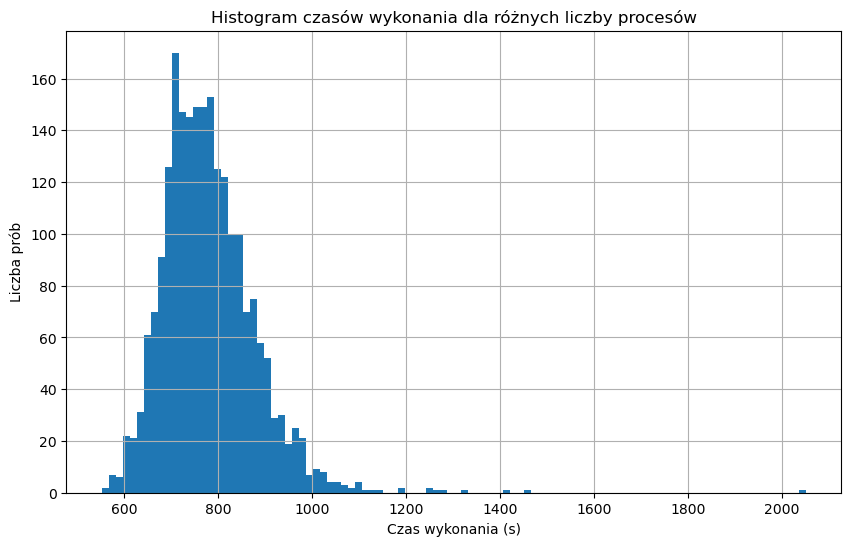

In [15]:
plot_histogram(df,32,1000,100)

In [16]:
grouped = df.groupby(['processes','size'])['time'].agg(['mean', 'median']).reset_index()

time_mean_ortodox = grouped[grouped['processes'] == 1][['size', 'mean']].rename(columns={'mean': 'time_mean_ortodox'})

grouped = grouped.merge(time_mean_ortodox, on='size', how='left')

grouped['speedup_ort'] = grouped['time_mean_ortodox'] / grouped['mean']

grouped['efficiency_ort'] = grouped['speedup_ort'] / grouped['processes']



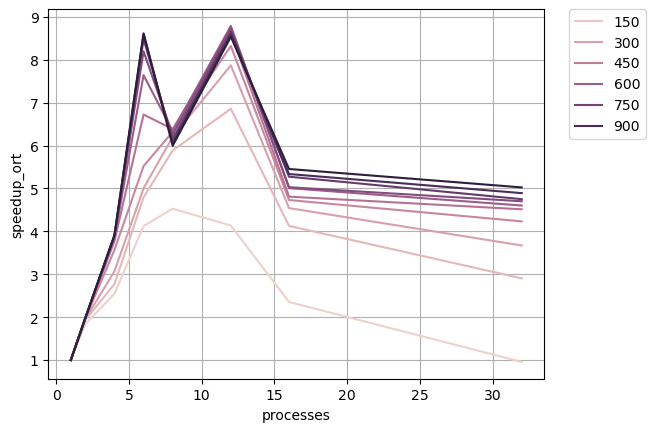

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

filtered_df_ortodox = grouped[grouped['processes'] >= 1]
# filtered_df['size'] = filtered_df['size'].astype(str)

sns.lineplot(data=filtered_df_ortodox, x="processes", y="speedup_ort", hue = "size")
# plt.yscale('log')
# plt.xscale('log')
plt.grid("on")

plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

/tmp/ipykernel_4468/2106049233.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_ortodox['processes'] = filtered_df_ortodox['processes'].astype(str)


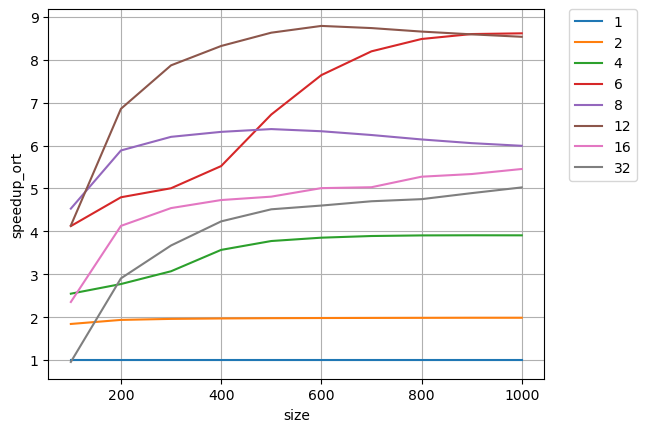

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

filtered_df_ortodox = grouped[grouped['processes'] >= 1]
filtered_df_ortodox['processes'] = filtered_df_ortodox['processes'].astype(str)

sns.lineplot(data=filtered_df_ortodox, x="size", y="speedup_ort", hue = "processes")
# plt.yscale('log')
# plt.xscale('log')
plt.grid("on")

plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

In [19]:
time_mean_strong = grouped[grouped['processes'] == -1][['size', 'median']].rename(columns={'median': 'time_mean_strong'})

grouped = grouped.merge(time_mean_strong, on='size', how='left')

grouped['speedup_str'] = grouped['time_mean_strong'] / grouped['median']
grouped['efficiency_str'] = grouped['speedup_str'] / grouped['processes']
grouped


,processes,size,mean,median,time_mean_ortodox,speedup_ort,efficiency_ort,time_mean_strong,speedup_str,efficiency_str
0,-1,100,5.166751,5.098295,4.187458,0.810462,-0.810462,5.098295,1.000000,-1.000000
1,-1,200,40.428719,40.306050,32.277065,0.798370,-0.798370,40.306050,1.000000,-1.000000
2,-1,300,142.524390,142.388000,107.683603,0.755545,-0.755545,142.388000,1.000000,-1.000000
3,-1,400,354.902613,355.761000,253.647118,0.714695,-0.714695,355.761000,1.000000,-1.000000
4,-1,500,742.600220,742.786000,493.616080,0.664713,-0.664713,742.786000,1.000000,-1.000000
...,...,...,...,...,...,...,...,...,...,...
95,32,600,184.815616,179.322500,850.540781,4.602105,0.143816,1310.475000,7.307923,0.228373
96,32,700,286.699785,282.173500,1348.154242,4.702320,0.146948,2124.330000,7.528453,0.235264
97,32,800,422.843492,415.741500,2009.087772,4.751374,0.148480,3254.050000,7.827099,0.244597
98,32,900,584.313552,575.374000,2858.420958,4.891930,0.152873,4675.960000,8.126818,0.253963


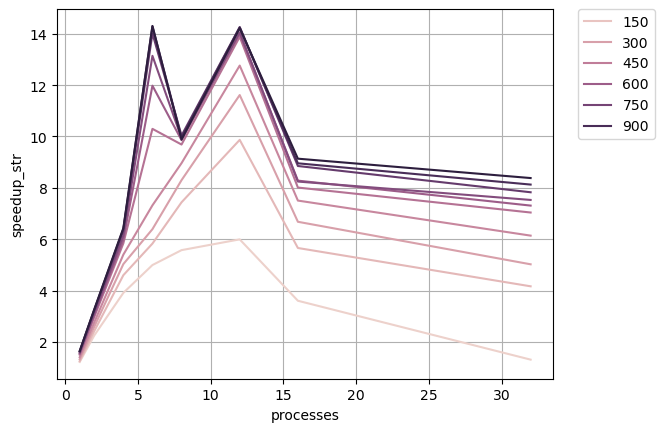

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

filtered_df_strong = grouped[grouped['processes'] >= 1]
# filtered_df['size'] = filtered_df['size'].astype(str)

sns.lineplot(data=filtered_df_strong, x="processes", y="speedup_str", hue = "size")
# plt.yscale('log')
# plt.xscale('log')
plt.grid("on")

plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

/tmp/ipykernel_4468/516042938.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_strong['processes'] = filtered_df_strong['processes'].astype(str)


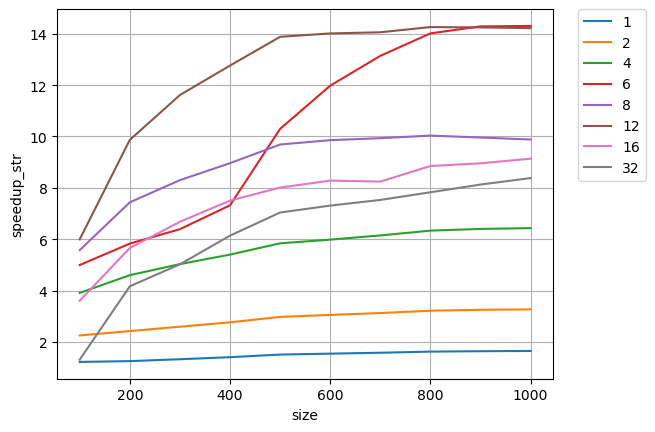

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

filtered_df_strong = grouped[grouped['processes'] >= 1]
filtered_df_strong['processes'] = filtered_df_strong['processes'].astype(str)

sns.lineplot(data=filtered_df_strong, x="size", y="speedup_str", hue = "processes")
# plt.yscale('log')
# plt.xscale('log')
plt.grid("on")

plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)